### Load and transform input data

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
max_features = 10000 # size of vocabulary (one-hot encoding)
embedding_vector_size = 32 # embed vocabulary into float vector
maxlen = 500 # max length of reviews (in terms of number of words)
batch_size = 64

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), ' training sequences of shape ', x_train.shape)
print(len(x_test), ' test sequences of shape ', x_test.shape)

25000  training sequences of shape  (25000,)
25000  test sequences of shape  (25000,)


In [5]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('Training sequences\' shape: ', x_train.shape)
print('Test sequences\' shape: ', x_test.shape)

Training sequences' shape:  (25000, 500)
Test sequences' shape:  (25000, 500)


### Set up neural network model and fit it to data

In [6]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, GRU

model = Sequential()
model.add(Embedding(max_features, embedding_vector_size, input_length=maxlen))
model.add(GRU(32, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])
history = model.fit(x_train[:2500], y_train[:2500], 
                    batch_size=batch_size, 
                    epochs=10, 
                    validation_split=0.2)

Train on 2000 samples, validate on 500 samples
Epoch 1/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.6901 - acc: 0.5575 - val_loss: 0.6839 - val_acc: 0.6080
Epoch 2/10
2000/2000 [==============================] - 13s 6ms/step - loss: 0.6413 - acc: 0.7150 - val_loss: 0.5991 - val_acc: 0.7100
Epoch 3/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.4579 - acc: 0.8245 - val_loss: 0.5036 - val_acc: 0.7680
Epoch 4/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.3075 - acc: 0.8830 - val_loss: 0.5615 - val_acc: 0.7540
Epoch 5/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.2200 - acc: 0.9270 - val_loss: 0.4647 - val_acc: 0.8140
Epoch 6/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.1360 - acc: 0.9580 - val_loss: 0.5148 - val_acc: 0.8060
Epoch 7/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.0916 - acc: 0.9735 - val_loss: 0.5223 - val_acc: 0.7960
Epoch 8/

In [9]:
model.save('01fIMDB2500_Embed_GRU32_RCDropout02_Dense1.h5')

### Plot results of the fitting

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

In [12]:
epochs = range(1, len(acc) + 1)

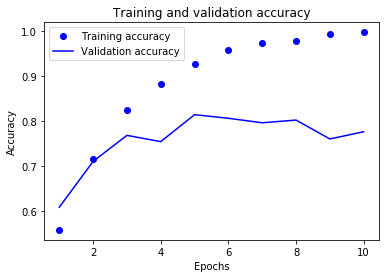

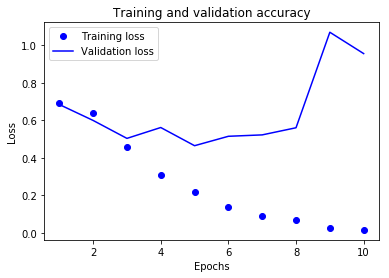

In [13]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation accuracy')
plt.legend()